In [105]:
#1. Get a dataset of all Zählstellen
import json
import pandas as pd
import requests
import numpy as np


In [106]:
#read the data from the web
response = requests.get("https://iot.hamburg.de/v1.1/Datastreams?$filter=properties/serviceName eq 'HH_STA_AutomatisierteVerkehrsmengenerfassung' and properties/layerName eq 'Anzahl_Kfz_Zaehlstelle_1-Tag'&$top=500")

In [107]:
#Turn the JSON response in usable data
#Extract the data from the the response object
betterdata=response.json()
#only select the data, which are under the heading "value" and convert this to a pandas dataframe
test = betterdata["value"]
df = pd.DataFrame.from_dict(test)
df.head()

,description,@iot.id,name,observationType,observedArea,phenomenonTime,properties,resultTime,@iot.selfLink,unitOfMeasurement,Thing@iot.navigationLink,Observations@iot.navigationLink,ObservedProperty@iot.navigationLink,Sensor@iot.navigationLink
0,Die Anzahl der von der Infrarotkamera erfasste...,15808,Kfz-Aufkommen an Verkehrszählstelle 0216931 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.949614, 53...",2021-08-10T22:00:00.000Z/2021-08-13T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-08-12T01:47:21.810Z/2021-08-14T01:47:51.680Z,https://iot.hamburg.de/v1.1/Datastreams(15808),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...
1,Die Anzahl der von der Infrarotkamera erfasste...,14812,Kfz-Aufkommen an Verkehrszählstelle 0222972 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.140319, 5...",2020-10-31T23:00:00.000Z/2021-08-13T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-01-23T01:47:30.603Z/2021-08-14T01:45:11.445Z,https://iot.hamburg.de/v1.1/Datastreams(14812),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(14812)...,https://iot.hamburg.de/v1.1/Datastreams(14812)...,https://iot.hamburg.de/v1.1/Datastreams(14812)...,https://iot.hamburg.de/v1.1/Datastreams(14812)...
2,Die Anzahl der von der Infrarotkamera erfasste...,13008,Kfz-Aufkommen an Verkehrszählstelle 0244920 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.107262, 5...",2020-10-31T23:00:00.000Z/2021-08-13T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-02-02T15:01:35.924Z/2021-08-14T01:17:05.064Z,https://iot.hamburg.de/v1.1/Datastreams(13008),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13008)...,https://iot.hamburg.de/v1.1/Datastreams(13008)...,https://iot.hamburg.de/v1.1/Datastreams(13008)...,https://iot.hamburg.de/v1.1/Datastreams(13008)...
3,Die Anzahl der von der Infrarotkamera erfasste...,13616,Kfz-Aufkommen an Verkehrszählstelle 0311971 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.034157, 5...",2020-12-06T23:00:00.000Z/2021-08-13T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-02-02T13:21:36.627Z/2021-08-14T01:25:49.916Z,https://iot.hamburg.de/v1.1/Datastreams(13616),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13616)...,https://iot.hamburg.de/v1.1/Datastreams(13616)...,https://iot.hamburg.de/v1.1/Datastreams(13616)...,https://iot.hamburg.de/v1.1/Datastreams(13616)...
4,Die Anzahl der von der Infrarotkamera erfasste...,13600,Kfz-Aufkommen an Verkehrszählstelle 0314962 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.057635, 5...",2020-10-31T23:00:00.000Z/2021-08-13T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-01-23T01:27:30.375Z/2021-08-14T01:25:24.508Z,https://iot.hamburg.de/v1.1/Datastreams(13600),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13600)...,https://iot.hamburg.de/v1.1/Datastreams(13600)...,https://iot.hamburg.de/v1.1/Datastreams(13600)...,https://iot.hamburg.de/v1.1/Datastreams(13600)...


In [108]:
#2. Loop through the links of all "Zählstellen" to receive a dataset of the nr. of vehicles for every day/every "Zählstelle"

## generate links and append to df
df["links"] = df["Observations@iot.navigationLink"].apply(lambda x: x + "?$top=600")
df['id'] = df['@iot.id']

# clean dataframe where we dont find geo information
# 2 rows should be removed
print(f'Rows before NA removal: {len(df)}')
df = df.dropna()
print(f'Rows after NA removal: {len(df)}')
# extract the lat/long information to join later
df['long'] = df['observedArea'].apply(lambda x: x['coordinates'][0])
df['lat'] = df['observedArea'].apply(lambda x: x['coordinates'][1])

Rows before NA removal: 500
Rows after NA removal: 494


In [109]:
# create a list for the results
columns = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data = list()
df_complete = pd.DataFrame(columns = columns)

unique_links = df["links"].unique()

for link in unique_links:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp = pd.DataFrame.from_dict(json["value"])
    if set(columns).issubset(set(df_temp.columns)):
        df_temp = df_temp[columns]
        df_temp['id'] = link[40:45]
        df_complete = df_complete.append(df_temp,sort=False)
#        df_complete['id'] = df_complete['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data.append(link)
df_complete['id'] = df_complete['id'].astype('int64')
df_complete['result'] = df_complete['result'].astype('int64')

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15808)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14812)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13008)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13616)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13600)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13636)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15732)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13400)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15812)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15736)/Observations?$top=600
Retrieving data for h

In [110]:
missing_data

[]

In [111]:
len(df_complete)

121652

In [112]:
df_complete.head()

,@iot.id,phenomenonTime,result,resultTime,id
0,217458399,2021-08-11T22:00:00.000Z/2021-08-12T21:59:59.000Z,1090,2021-08-13T01:47:21.106Z,15808
1,216650904,2021-08-10T22:00:00.000Z/2021-08-11T21:59:59.000Z,1040,2021-08-12T01:47:21.810Z,15808
2,219332283,2021-08-12T22:00:00.000Z/2021-08-13T21:59:59.000Z,1013,2021-08-14T01:47:51.680Z,15808
0,51222146,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,7831,2021-01-23T01:47:30.603Z,14812
1,51496408,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,5187,2021-01-24T01:50:38.217Z,14812


In [113]:
df_raw = pd.merge(df_complete,df[['id','lat','long']], how='inner',on='id')
                        

In [114]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,217458399,2021-08-11T22:00:00.000Z/2021-08-12T21:59:59.000Z,1090,2021-08-13T01:47:21.106Z,15808,53.650597,9.949614
1,216650904,2021-08-10T22:00:00.000Z/2021-08-11T21:59:59.000Z,1040,2021-08-12T01:47:21.810Z,15808,53.650597,9.949614
2,219332283,2021-08-12T22:00:00.000Z/2021-08-13T21:59:59.000Z,1013,2021-08-14T01:47:51.680Z,15808,53.650597,9.949614
3,51222146,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,7831,2021-01-23T01:47:30.603Z,14812,53.628402,10.140319
4,51496408,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,5187,2021-01-24T01:50:38.217Z,14812,53.628402,10.140319


In [115]:
df_raw.loc[df_raw['id']!=13600]

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,217458399,2021-08-11T22:00:00.000Z/2021-08-12T21:59:59.000Z,1090,2021-08-13T01:47:21.106Z,15808,53.650597,9.949614
1,216650904,2021-08-10T22:00:00.000Z/2021-08-11T21:59:59.000Z,1040,2021-08-12T01:47:21.810Z,15808,53.650597,9.949614
2,219332283,2021-08-12T22:00:00.000Z/2021-08-13T21:59:59.000Z,1013,2021-08-14T01:47:51.680Z,15808,53.650597,9.949614
3,51222146,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,7831,2021-01-23T01:47:30.603Z,14812,53.628402,10.140319
4,51496408,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,5187,2021-01-24T01:50:38.217Z,14812,53.628402,10.140319
...,...,...,...,...,...,...,...
121647,207523877,2021-07-30T22:00:00.000Z/2021-07-31T21:59:59.000Z,4156,2021-08-01T01:36:41.721Z,14412,53.530336,10.065717
121648,208617775,2021-07-31T22:00:00.000Z/2021-08-01T21:59:59.000Z,2851,2021-08-02T01:36:38.529Z,14412,53.530336,10.065717
121649,210239080,2021-08-01T22:00:00.000Z/2021-08-02T21:59:59.000Z,4901,2021-08-03T01:37:01.595Z,14412,53.530336,10.065717
121650,211949905,2021-08-02T22:00:00.000Z/2021-08-03T21:59:59.000Z,4572,2021-08-04T01:38:46.295Z,14412,53.530336,10.065717


## Debug section

In [116]:
# only for debugging
columns_test = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data_test = list()
df_complete_test = pd.DataFrame(columns = columns_test)

# first link doesnt return data, second one works
unique_links_test = ['https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600',
                     'https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600']

for link in unique_links_test:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp_test = pd.DataFrame.from_dict(json["value"])
    if set(columns_test).issubset(set(df_temp_test.columns)):
        df_temp_test = df_temp_test[columns_test]
        df_temp_test['id'] = link[40:45]
        df_complete_test = df_complete_test.append(df_temp_test,sort=False)
        df_complete_test['id'] = df_temp_test['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data_test.append(link)


Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
---- WARNING: No data available or wrong columns selected for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600


In [117]:
df_raw_test = pd.merge(df_complete_test,df[['id','lat','long']], how='inner',on='id')
                        

In [118]:
df_raw_test

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,51218837,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,11444.0,2021-03-15T20:26:03.599Z,13596,53.579579,10.057484
1,51493103,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,9611.0,2021-03-15T20:47:20.954Z,13596,53.579579,10.057484
2,51730741,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,6940.0,2021-03-15T21:07:40.572Z,13596,53.579579,10.057484
3,51836604,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11225.0,2021-03-15T13:09:26.108Z,13596,53.579579,10.057484
4,51836487,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,18010.0,2021-03-15T13:09:53.581Z,13596,53.579579,10.057484
...,...,...,...,...,...,...,...
126,152467732,2021-06-17T22:00:00.000Z/2021-06-18T21:59:59.000Z,13858.0,2021-06-19T01:24:36.318Z,13596,53.579579,10.057484
127,154042210,2021-06-18T22:00:00.000Z/2021-06-19T21:59:59.000Z,10788.0,2021-06-20T01:24:37.147Z,13596,53.579579,10.057484
128,155510409,2021-06-19T22:00:00.000Z/2021-06-20T21:59:59.000Z,466.0,2021-06-21T01:24:28.328Z,13596,53.579579,10.057484
129,160875346,2021-06-24T22:00:00.000Z/2021-06-25T21:59:59.000Z,1828.0,2021-06-26T01:24:42.911Z,13596,53.579579,10.057484


Visualisierung - Patricia
1. Wochentage rausfinden und Durchschnitt über Wochentage legen

In [119]:
weekday_list=[]

for i in df_raw['phenomenonTime']:
    t = i[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    print(weekday)

weekday_list.append(weekday)



Thursday
Wednesday
Friday
Friday
Saturday
Sunday
Friday
Tuesday
Monday
Saturday
Tuesday
Thursday
Sunday
Saturday
Monday
Friday
Wednesday
Tuesday
Thursday
Monday
Tuesday
Saturday
Sunday
Monday
Tuesday
Sunday
Wednesday
Friday
Friday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Thursday
Saturday
Sunday
Wednesday
Monday
Thursday
Friday
Tuesday
Saturday
Sunday
Wednesday
Saturday
Sunday
Monday
Thursday
Tuesday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Friday
Tuesday
Thursday
Wednesday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturd

Meistens kann man die apply Funktion für solche Fälle nutzen, also wenn man für jeden Wert oder jede Reihe etwas anwenden will.
Konkret im unteren Beispiel wird `apply(lambda x: get_weekday(x))` für jeden Wert in `df_raw['phenomenonTime']` angewendet und `return weekday`. Das kann dann einfach in eine neue Spalte gespeichert werden (siehe df['weekday'], dieser Key muss vorher nicht existieren)

In [120]:
# Dein Code nur als Funktion
def get_weekday(input_date):
    t = input_date[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    return weekday

In [121]:
# lass das laufen und du siehst was der Output ist
# ich nutze df_raw_test, damit das etwas schneller ist
df_raw_test['phenomenonTime'].apply(lambda x: get_weekday(x))

0        Friday
1      Saturday
2        Sunday
3        Sunday
4       Tuesday
         ...   
126      Friday
127    Saturday
128      Sunday
129      Friday
130    Saturday
Name: phenomenonTime, Length: 131, dtype: object

## Debug Ende

In [122]:
# neue Spalte im Dataframe
df_raw['weekday'] = df_raw['phenomenonTime'].apply(lambda x: get_weekday(x))

In [123]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long,weekday
0,217458399,2021-08-11T22:00:00.000Z/2021-08-12T21:59:59.000Z,1090,2021-08-13T01:47:21.106Z,15808,53.650597,9.949614,Thursday
1,216650904,2021-08-10T22:00:00.000Z/2021-08-11T21:59:59.000Z,1040,2021-08-12T01:47:21.810Z,15808,53.650597,9.949614,Wednesday
2,219332283,2021-08-12T22:00:00.000Z/2021-08-13T21:59:59.000Z,1013,2021-08-14T01:47:51.680Z,15808,53.650597,9.949614,Friday
3,51222146,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,7831,2021-01-23T01:47:30.603Z,14812,53.628402,10.140319,Friday
4,51496408,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,5187,2021-01-24T01:50:38.217Z,14812,53.628402,10.140319,Saturday


Maren
Goal: Create "clean" csv file, so everyone can work with that from now on

advantages: 
- no useless columns anymore
- the downloaded data/dates don´t change any more
- otherwise with every time running the codes a dataset with daily updated data occurs, which might confuse our results


In [124]:
# convert the dates to a correct format
phenomenonTime = df_raw["phenomenonTime"]

phenomenonTime=phenomenonTime.astype(str)
phenomenonDate=phenomenonTime.str.replace("(.*)\/", "", regex = True)
phenomenonDate=phenomenonDate.str.replace("T(.*)", "", regex = True)

df_raw["phenomenonDate"] = pd.to_datetime(phenomenonDate)



In [125]:
df_raw.dtypes

@iot.id                   object
phenomenonTime            object
result                     int64
resultTime                object
id                         int64
lat                      float64
long                     float64
weekday                   object
phenomenonDate    datetime64[ns]
dtype: object

In [126]:
# Keep only relevant columns
columns = ['@iot.id','phenomenonDate', 'result','id','lat','long','weekday']

In [127]:
df_raw = df_raw[columns]

In [128]:
df_raw

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,217458399,2021-08-12,1090,15808,53.650597,9.949614,Thursday
1,216650904,2021-08-11,1040,15808,53.650597,9.949614,Wednesday
2,219332283,2021-08-13,1013,15808,53.650597,9.949614,Friday
3,51222146,2021-01-22,7831,14812,53.628402,10.140319,Friday
4,51496408,2021-01-23,5187,14812,53.628402,10.140319,Saturday
...,...,...,...,...,...,...,...
121647,207523877,2021-07-31,4156,14412,53.530336,10.065717,Saturday
121648,208617775,2021-08-01,2851,14412,53.530336,10.065717,Sunday
121649,210239080,2021-08-02,4901,14412,53.530336,10.065717,Monday
121650,211949905,2021-08-03,4572,14412,53.530336,10.065717,Tuesday


Maren: Clean rest of the dataset
- Are there results with 0 ? --> Drop
- Are there duplicates in Zählstellen/ phenomenondate? --> Drop one of them

In [129]:
#drop all observations which have 0 as result
df_raw[df_raw.result!=0]

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,217458399,2021-08-12,1090,15808,53.650597,9.949614,Thursday
1,216650904,2021-08-11,1040,15808,53.650597,9.949614,Wednesday
2,219332283,2021-08-13,1013,15808,53.650597,9.949614,Friday
3,51222146,2021-01-22,7831,14812,53.628402,10.140319,Friday
4,51496408,2021-01-23,5187,14812,53.628402,10.140319,Saturday
...,...,...,...,...,...,...,...
121647,207523877,2021-07-31,4156,14412,53.530336,10.065717,Saturday
121648,208617775,2021-08-01,2851,14412,53.530336,10.065717,Sunday
121649,210239080,2021-08-02,4901,14412,53.530336,10.065717,Monday
121650,211949905,2021-08-03,4572,14412,53.530336,10.065717,Tuesday


,id
phenomenonDate,
2021-03-27,853
2021-07-01,790


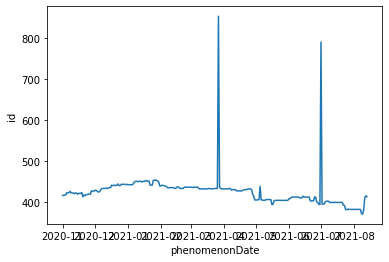

In [130]:
#find problematic observations
#Are there duplicates in combination Zählstellen/ phenomenondate? 


## pivot: count numbers of Zählstellen("id") per phenomenondate --> saved as CountZählstelle
CountZaehlstelle = df_raw.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=CountZaehlstelle, x = "phenomenonDate", y = "id")

CountZaehlstelle
## find the problematic dates: There were measured almost double the Zählstellen than on the other dates
CountZaehlstelle[CountZaehlstelle.id > 500]

In [131]:
##--> problematic dates are: 2021-03-27 and 2021-07-01
Problemdata_a = df_raw[df_raw.phenomenonDate == "2021-03-27"]
Problemdata_b = df_raw[df_raw.phenomenonDate == "2021-07-01"]

## pivot: Find out whether the 2 entries for every Zählstelle on 2021-03-27 and 2021-07-01 are so close together that we can just drop one of each
Problemdata_apiv = Problemdata_a.pivot_table(values = "result", index = "id", aggfunc = lambda x: max(x) - min(x))
Problemdata_apiv[Problemdata_apiv.result > 100]


,result
id,
12904,420
13228,165
13232,106
13908,111
14636,114


In [133]:
Problemdata_bpiv = Problemdata_b.pivot_table(values = "result", index = "id", aggfunc = lambda x: max(x) - min(x))
Problemdata_bpiv[Problemdata_bpiv.result > 100]

##--> result: yes, we can drop duplicates in the dataset according to id/phenomenonDate 
## because the difference in result between the duplicates is not so big


,result
id,


In [137]:
#drop duplicates
df_raw=df_raw.drop_duplicates(['phenomenonDate','id'],keep= 'first')


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

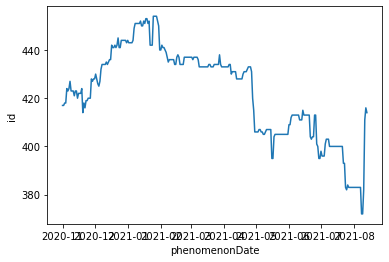

In [138]:
## pivot: count numbers of Zählstellen("id") per phenomenondate 
CountZaehlstelle_final = df_raw.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")


sns.lineplot(data=CountZaehlstelle_final, x = "phenomenonDate", y = "id")

In [140]:
#save in csv format
df_raw.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\clean_data_2021-08-14.csv',index=False)